### Задание 6.11

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [151]:
dataset = list([6.74348, 3.93051, 6.72063, 4.14899, 3.64511, 6.59035, 3.59793,
6.5809, 5.12561, 4.8383, 5.1555, 7.92425, 7.84539, 7.04955, 5.00687,
4.49564, 5.02336, 4.59321, 2.45032, 8.07116, 4.69684, 8.20604,
9.42367, 8.26365, 2.72062, 5.56433, 1.87337, 6.35261, 1.97432,
4.56908, 6.39021, 8.4757, 4.77942, 3.19108, 6.97562, 9.33791,
3.00108, 3.0248, 6.9238, 4.33534, 4.44541, 6.10264, 3.34966, 5.93498,
12.474, 4.84062, 3.75677, 7.75301, 2.86758, 4.56388, 2.74132,
5.97667, 2.76106, 4.29834, 13.0064, 5.67736, 4.1344, 4.17623,
5.20321, 2.60971, 6.83748, 5.4506, 4.73761, 4.69527, 9.88338,
5.48915, 6.58642, 7.22878, 5.38608, 9.08009, 5.71995, 8.25966,
7.57421, 5.21986, 2.25692, 7.20102, 6.31931, 4.81176, 5.59663,
7.52932, 2.39608, 2.07021, 5.77452, 9.28159, 4.07254, 3.22207,
4.87043, 6.92726, 5.89108, 4.41516, 4.19383, 6.72437, 8.02389,
5.38766, 3.56919, 5.60499, 4.14681, 3.71408, 9.26791, 3.97992])
n = len(dataset)
xl = sum(np.log(dataset))
xl/n

1.637061529784678

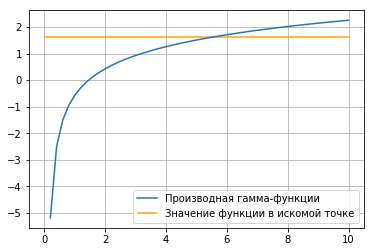

In [152]:
from scipy.special import digamma
x = np.linspace(0,10)
y1 = digamma(x)
y2 = xl/n
plt.grid(True)
#plt.ylim(0,2)
plt.plot(x, y1, label='Производная гамма-функции')
plt.legend(loc='lower right')
plt.hlines(y2, 0, 10, color='orange', label='Значение функции в искомой точке')
plt.legend(loc='lower right')
plt.show()

In [39]:
from scipy.optimize import fsolve

In [153]:
lambd_start = 5.0
f = lambda lambd: y2-digamma(lambd)
lambd_estimator = fsolve(f, lambd_start)
print("Оценка параметра = ", float(lambd_estimator))

Оценка параметра =  5.631970963941104


In [48]:
float(digamma(lambd_estimator))

1.6370615297846776

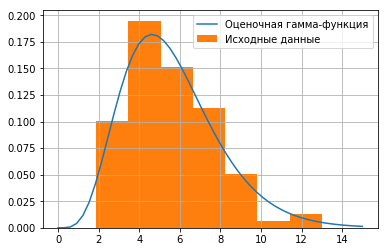

In [154]:
plt.grid(True)
x = np.linspace(0,15)
y = stats.gamma.pdf(x,lambd_estimator,scale=1)
plt.plot(x,y,label='Оценочная гамма-функция')
k = 1 + int(np.log2(n))
plt.hist(dataset,bins=k,density=True,label='Исходные данные')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Функция правдоподобия')

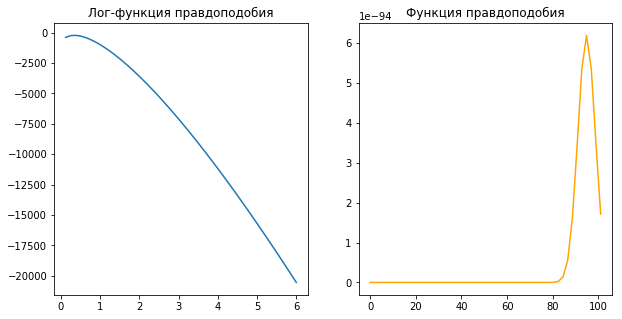

In [155]:
lam1 = np.linspace(0,6)
lam2 = np.linspace(0,101)
s = plt.figure(figsize=(10,5))
likelihood_y = np.exp((lam1-1)*xl-sum(dataset)-n*np.log(gamma(lam1)))
log_likelihood_y = (lam2-1)*xl-sum(dataset)-n*np.log(gamma(lam2))
k1 = s.add_subplot(1,2,1)
k2 = s.add_subplot(1,2,2)
k1.plot(lam1,log_likelihood_y)
k1.set_title('Лог-функция правдоподобия')
k2.plot(lam2,likelihood_y,color='orange')
k2.set_title('Функция правдоподобия')

In [157]:
from scipy.stats import gamma
gamma.fit(dataset)

(5.116659949431477, 0.5815431391938619, 0.9723774249698709)

### Задание 6.12

In [8]:
data = [1.55992, 43.2871, 2.16074, 141.461, 21.8806, 789.103, 3.38349,
1.4301, 4.65028, 5.52295, 1.99389, 2.89912, 3.27455, -0.97966,
-1.29387, 3.19466, 2.69071, -13.4734, 2.60047, 2.4326, -9.81549,
-6.7011, 7.25876, 3.80736, 5.8334, -5.69205, 2.12113, 7.19453,
4.47766, 6.30852, 1.65032, 2.0556, 2.82256, 10.7818, -18.6957,
-14.6507, 3.8727, 0.0355214, -1.94195, -21.8609, 3.56743, 26.9564,
6.57674, 2.07393, 14.5048, -5.26786, 4.23976, -1.01941, -0.570729,
-14.8699, 5.67471, -0.285076, 3.79854, 3.41434, -0.483942, -14.3194,
1.32465, -0.00208467, 1.88125, -2.5221, 1.71194, -17.8143, 1.52726,
4.11685, -1.55211, -8.20171, -4.44914, 3.97162, -17.8141, 4.64827,
5.35789, 1.90477, 0.0930849, 4.70019, -13.379, 4.36651, -4.11415,
-8.60035, -11.5259, -3.02139, 11.7426, 3.08539, 2.74418, 2.45758,
-0.962123, -75.5719, -0.753557, 4.24318, 1.38095, 1.3298, 7.38925,
-27.0796, -12.5197, 4.4771, 83.4916, 9.00757, 4.50623, -2.42047,
3.23398, 7.88624]
n = len(data)

In [131]:
#def sum_f(function, data):
    #return sum(function(x) for x in data)

In [136]:
#f_MLE_a =  sum_f(lambda x: 2*(x-a)/(b**2+(x-a)**2), data)
#f_MLE_b = n/b - sum_f(lambda x: 2*b/(b**2+(x-a)**2), data)

In [6]:
from scipy.stats import cauchy

In [9]:
estimators = cauchy.fit(data) 
print('a = ', round(estimators[0],9), 'b = ', round(estimators[1], 9))

a =  2.387427681 b =  2.996793487


In [1]:
d = [1.55992, 2.16074, 3.38349,
1.4301, 4.65028, 5.52295, 1.99389, 2.89912, 3.27455, -0.97966,
-1.29387, 3.19466, 2.69071, -13.4734, 2.60047, 2.4326, -9.81549,
-6.7011, 7.25876, 3.80736, 5.8334, -5.69205, 2.12113, 7.19453,
4.47766, 6.30852, 1.65032, 2.0556, 2.82256, 10.7818, -18.6957,
-14.6507, 3.8727, 0.0355214, -1.94195, 3.56743, 
6.57674, 2.07393, 14.5048, -5.26786, 4.23976, -1.01941, -0.570729,
-14.8699, 5.67471, -0.285076, 3.79854, 3.41434, -0.483942, -14.3194,
1.32465, -0.00208467, 1.88125, -2.5221, 1.71194, -17.8143, 1.52726,
4.11685, -1.55211, -8.20171, -4.44914, 3.97162, -17.8141, 4.64827,
5.35789, 1.90477, 0.0930849, 4.70019, -13.379, 4.36651, -4.11415,
-8.60035, -11.5259, -3.02139, 11.7426, 3.08539, 2.74418, 2.45758,
-0.962123, -0.753557, 4.24318, 1.38095, 1.3298, 7.38925,
-12.5197, 4.4771, 9.00757, 4.50623, -2.42047,
3.23398, 7.88624]
N = len(d)

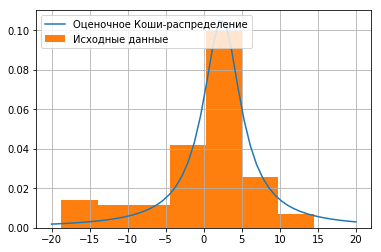

In [10]:
plt.grid(True)
x1 = np.linspace(-20,20)
y1 = stats.cauchy.pdf(x1,loc=estimators[0],scale=estimators[1])
plt.plot(x1,y1,label='Оценочное Коши-распределение')
k1 = 1 + int(np.log2(N))
plt.hist(d,bins=k1,density=True,label='Исходные данные')
plt.legend(loc='upper left')